## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
print("Required libraries are imported")

Required libraries are imported


### Load the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('tips.csv')

# Print the first five rows
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [14]:
import pandas as pd

# Read the dataset
df = pd.read_csv('tips.csv')  
# Get the list of column names
columns = df.columns

# Initialize empty lists for categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Iterate over the columns and determine the data type
for column in columns:
    if df[column].dtype == 'object':  # Categorical columns have the data type 'object'
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

# Print the lists of categorical and numerical columns
print("Categorical columns:")
print(categorical_columns)
print("\nNumerical columns:")
print(numerical_columns)

Categorical columns:
['sex', 'smoker', 'day', 'time']

Numerical columns:
['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [15]:
import pandas as pd

# Read the dataset
df = pd.read_csv('tips.csv')  

# Compute the average bill amount for each day
average_bill_by_day = df.groupby('day')['total_bill'].mean()

# Print the average bill amounts
print(average_bill_by_day)

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [3]:
import pandas as pd

# Read the dataset
df = pd.read_csv('tips.csv') 

# Calculate the mean tip amount for each gender
average_tip_by_gender = df.groupby('sex')['tip'].mean()

# Print the mean tip amount for each gender
print("Mean tip amount by gender:")
print(average_tip_by_gender)

# Determine the gender with the higher average tip amount
more_generous_gender = average_tip_by_gender.idxmax()

# Print the result
print("The gender that is more generous in giving tips is:", more_generous_gender)



Mean tip amount by gender:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
The gender that is more generous in giving tips is: Male


### 4. According to the data, were there more customers for dinner or lunch?

In [5]:
import pandas as pd

# Read the dataset
df = pd.read_csv('tips.csv')  

# Count the number of customers for each time (lunch or dinner)
customer_count_by_time = df['time'].value_counts()

# Print the customer count for each time
print("Customer count for each time (lunch or dinner):")
print(customer_count_by_time)

# Determine whether there were more customers for dinner or lunch
if customer_count_by_time['Dinner'] > customer_count_by_time['Lunch']:
    more_customers_time = 'Dinner'
else:
    more_customers_time = 'Lunch'

# Print the result
print("According to the data, there were more customers for", more_customers_time, "based on the customer count.")


Customer count for each time (lunch or dinner):
time
Dinner    176
Lunch      68
Name: count, dtype: int64
According to the data, there were more customers for Dinner based on the customer count.


### 5. Based on the statistical summary, comment on the variable 'tip'

In [3]:
import pandas as pd

# Read the dataset from a CSV file
filename = "tips.csv"
df = pd.read_csv(filename)

# Generate statistical summary of the 'tip' variable
tip_summary = df['tip'].describe()

# Print the statistical summary
print(tip_summary)

# Additional comments based on the statistical summary
if tip_summary['min'] == tip_summary['max']:
    print("All tips have the same amount.")
else:
    if tip_summary['mean'] > 3:
        print("On average, the tips are relatively high.")
    elif tip_summary['mean'] < 2:
        print("On average, the tips are relatively low.")
    else:
        print("The tips are moderately distributed.")

    if tip_summary['std'] > 1:
        print("There is a significant variability in tip amounts.")
    else:
        print("The tip amounts are relatively consistent.")


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64
The tips are moderately distributed.
There is a significant variability in tip amounts.


### 6. Find the busiest day in terms of the orders?

In [7]:
import pandas as pd

# Read the dataset
df = pd.read_csv('tips.csv') 

# Count the number of orders for each day
orders_by_day = df['day'].value_counts()

# Find the busiest day
busiest_day = orders_by_day.idxmax()

# Get the count of orders for each day
order_counts = orders_by_day.to_dict()

# Print the result
print("Orders by day:")
for day, count in order_counts.items():
    print(day, ": ", count)

print("\nThe busiest day in terms of orders is:", busiest_day)
print("There were", order_counts[busiest_day], "orders on", busiest_day)


Orders by day:
Sat :  87
Sun :  76
Thur :  62
Fri :  19

The busiest day in terms of orders is: Sat
There were 87 orders on Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

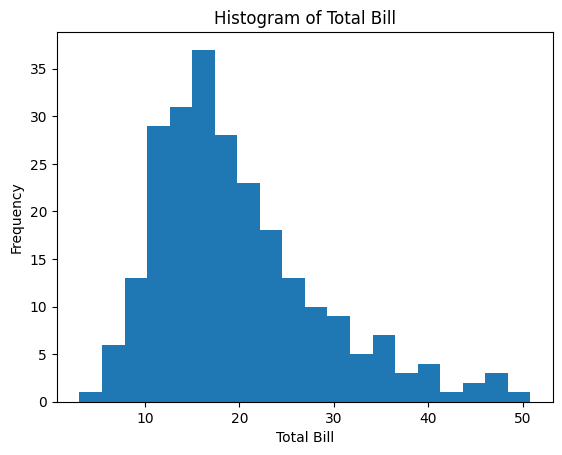

Is the variable 'total_bill' skewed?
Yes
Skewness Type: right-skewed


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('tips.csv')  

# Check the skewness of the 'total_bill' variable
skewness = df['total_bill'].skew()

# Determine the type of skewness
if skewness > 0:
    skewness_type = "right-skewed"
elif skewness < 0:
    skewness_type = "left-skewed"
else:
    skewness_type = "symmetric"

# Plot a histogram of the 'total_bill' variable
plt.hist(df['total_bill'], bins=20)
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.show()

# Print the results
print("Is the variable 'total_bill' skewed?")
print("Yes" if skewness_type != "symmetric" else "No")
print("Skewness Type:", skewness_type)


### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

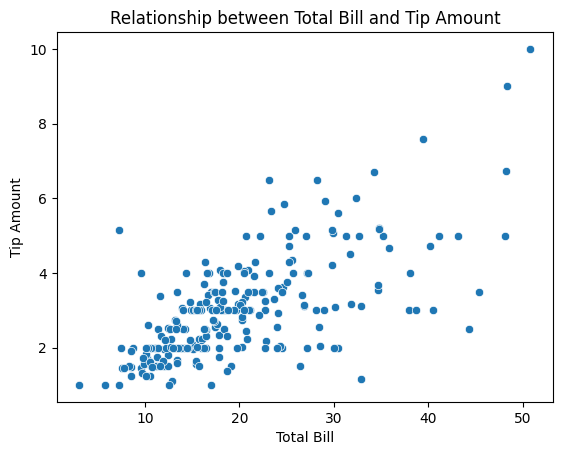

Correlation Coefficient: 0.6757341092113645
The tip amount has a positive correlation with the total bill.


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('tips.csv')  

# Visualize the relationship between total bill and tip amount
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.title('Relationship between Total Bill and Tip Amount')
plt.show()

# Calculate the correlation coefficient between total bill and tip amount
correlation = df['total_bill'].corr(df['tip'])

# Print the correlation coefficient and findings
print("Correlation Coefficient:", correlation)
if correlation > 0:
    print("The tip amount has a positive correlation with the total bill.")
elif correlation < 0:
    print("The tip amount has a negative correlation with the total bill.")
else:
    print("There is no correlation between the tip amount and the total bill.")


### 9. What is the percentage of males and females in the dataset? and display it in the plot

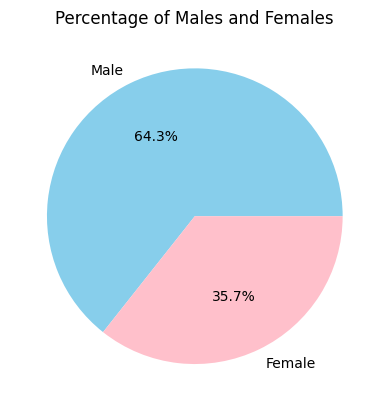

Percentage of Males: 64.34426229508196
Percentage of Females: 35.65573770491803


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('tips.csv')  

# Calculate the percentage of males and females
gender_counts = df['sex'].value_counts()
total_count = gender_counts.sum()
percentage_male = (gender_counts['Male'] / total_count) * 100
percentage_female = (gender_counts['Female'] / total_count) * 100

# Create a pie chart to display the percentages
labels = ['Male', 'Female']
sizes = [percentage_male, percentage_female]
colors = ['skyblue', 'pink']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Males and Females')
plt.show()

# Print the percentages
print("Percentage of Males:", percentage_male)
print("Percentage of Females:", percentage_female)


### 10. Compute the gender-wise count based on smoking habits and display it in the plot

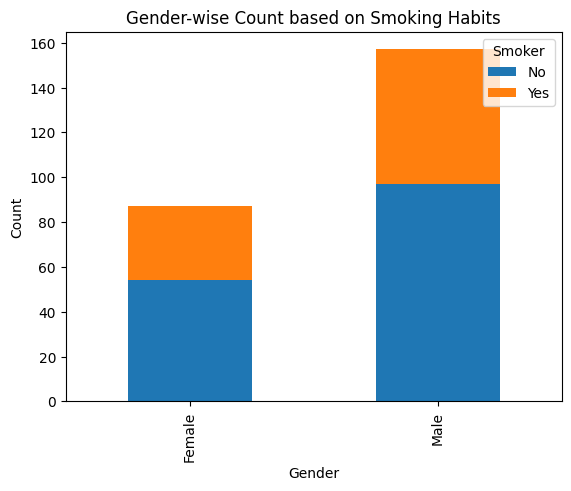

Gender-wise Count based on Smoking Habits:
smoker  No  Yes
sex            
Female  54   33
Male    97   60


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('tips.csv')  

# Compute the gender-wise count based on smoking habits
gender_smoker_counts = df.groupby(['sex', 'smoker']).size().unstack()

# Create a bar plot to display the counts
gender_smoker_counts.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender-wise Count based on Smoking Habits')
plt.legend(title='Smoker', loc='upper right')
plt.show()

# Print the counts
print("Gender-wise Count based on Smoking Habits:")
print(gender_smoker_counts)


### 11. Compute the average tip amount given for different days and display it in the plot.

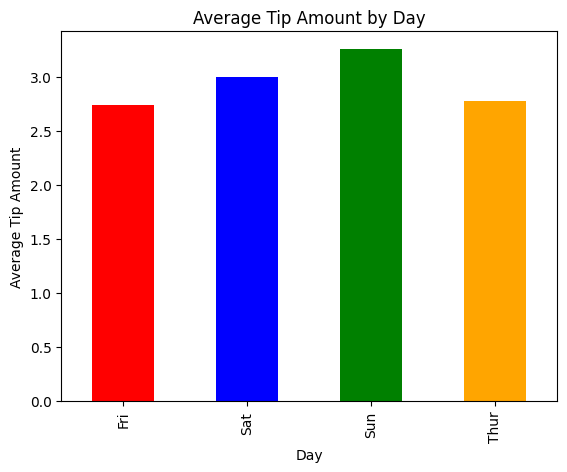

Average Tip Amount by Day:
day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('tips.csv')  

# Compute the average tip amount for different days
average_tip_by_day = df.groupby('day')['tip'].mean()

# Create a bar plot to display the average tip amounts with different colors
colors = ['red', 'blue', 'green', 'orange']
average_tip_by_day.plot(kind='bar', color=colors)
plt.xlabel('Day')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Day')
plt.show()

# Print the average tip amounts
print("Average Tip Amount by Day:")
print(average_tip_by_day)



### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

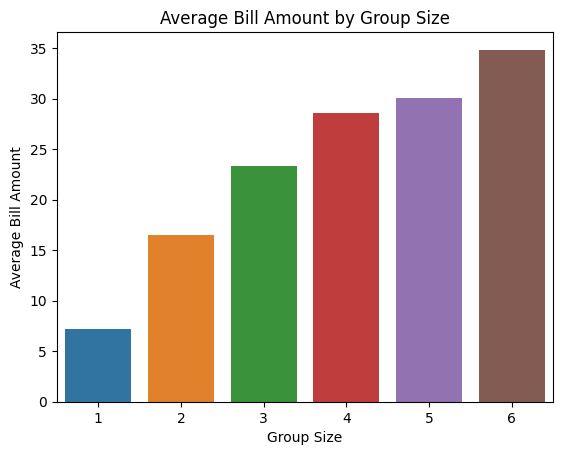

Average Bill Amount by Group Size:
size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('tips.csv') 

# Compute the average bill amount for each group size
average_bill_by_size = df.groupby('size')['total_bill'].mean()

# Create a bar chart to display the average bill amounts by group size
sns.barplot(x=average_bill_by_size.index, y=average_bill_by_size)
plt.xlabel('Group Size')
plt.ylabel('Average Bill Amount')
plt.title('Average Bill Amount by Group Size')
plt.show()

# Print the average bill amounts
print("Average Bill Amount by Group Size:")
print(average_bill_by_size)



### 13. Plot a horizontal boxplot to compare the bill amount based on gender

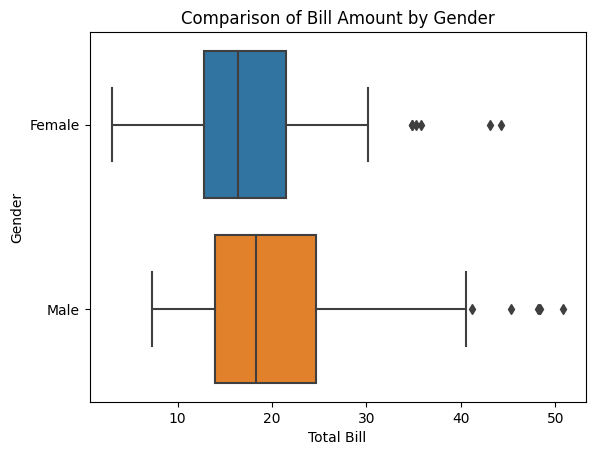

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('tips.csv')  

# Create a horizontal boxplot to compare the bill amount based on gender
sns.boxplot(data=df, x='total_bill', y='sex', orient='h')
plt.xlabel('Total Bill')
plt.ylabel('Gender')
plt.title('Comparison of Bill Amount by Gender')
plt.show()


### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [28]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('tips.csv')

# Filter the DataFrame for Saturday and Sunday separately and for lunch and dinner
saturday_lunch = df[(df['day'] == 'Sat') & (df['time'] == 'Lunch')]
saturday_dinner = df[(df['day'] == 'Sat') & (df['time'] == 'Dinner')]
sunday_lunch = df[(df['day'] == 'Sun') & (df['time'] == 'Lunch')]
sunday_dinner = df[(df['day'] == 'Sun') & (df['time'] == 'Dinner')]

# Find the maximum bill amount for lunch and dinner on Saturday and Sunday
max_bill_saturday_lunch = saturday_lunch['total_bill'].max()
max_bill_saturday_dinner = saturday_dinner['total_bill'].max()
max_bill_sunday_lunch = sunday_lunch['total_bill'].max()
max_bill_sunday_dinner = sunday_dinner['total_bill'].max()

# Print the results
print("Maximum bill amount for Saturday lunch:", max_bill_saturday_lunch)
print("Maximum bill amount for Saturday dinner:", max_bill_saturday_dinner)
print("Maximum bill amount for Sunday lunch:", max_bill_sunday_lunch)
print("Maximum bill amount for Sunday dinner:", max_bill_sunday_dinner)



Maximum bill amount for Saturday lunch: nan
Maximum bill amount for Saturday dinner: 50.81
Maximum bill amount for Sunday lunch: nan
Maximum bill amount for Sunday dinner: 48.17


### 15. Compute the percentage of missing values in the dataset.

In [29]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('tips.csv')

# Compute the percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Print the result
print("Percentage of missing values in the dataset:")
print(missing_percentages)


Percentage of missing values in the dataset:
total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64


### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [30]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('tips.csv')

# Check for duplicate records
duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    # Compute the count of duplicate records
    duplicate_count = len(duplicate_rows)

    print("Duplicate records found. Count:", duplicate_count)

    # Drop the duplicate records
    df.drop_duplicates(inplace=True)
    print("Duplicate records dropped.")
else:
    print("No duplicate records found.")

# Print the updated dataset
print(df)


Duplicate records found. Count: 1
Duplicate records dropped.
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[243 rows x 7 columns]


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

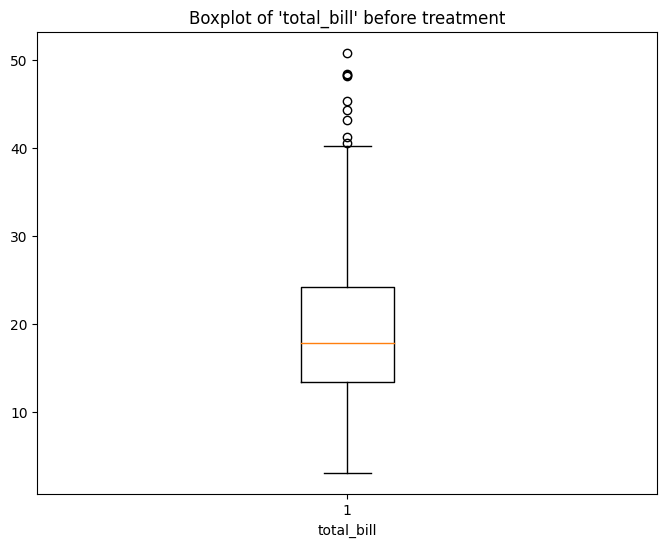

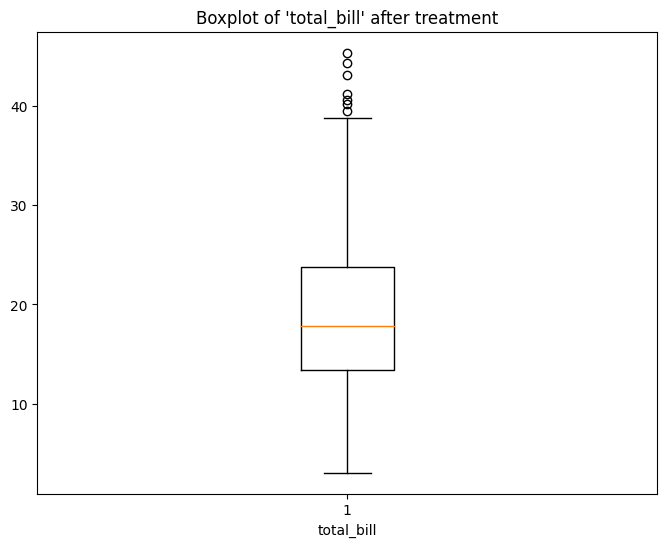

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('tips.csv')

# Plot boxplot before treatment
plt.figure(figsize=(8, 6))
plt.title("Boxplot of 'total_bill' before treatment")
plt.boxplot(df['total_bill'])
plt.xlabel('total_bill')
plt.show()

# Detect outliers using z-score method
z_scores = (df['total_bill'] - df['total_bill'].mean()) / df['total_bill'].std()
threshold = 3  # Adjust the threshold as desired (typically 2 or 3)

# Apply transformation approach to treat outliers
df['total_bill'] = df['total_bill'].where(abs(z_scores) <= threshold, df['total_bill'].median())

# Plot boxplot after treatment
plt.figure(figsize=(8, 6))
plt.title("Boxplot of 'total_bill' after treatment")
plt.boxplot(df['total_bill'])
plt.xlabel('total_bill')
plt.show()

# Print the updated dataset
print(df)


### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

Outliers are present in the 'tip' column.


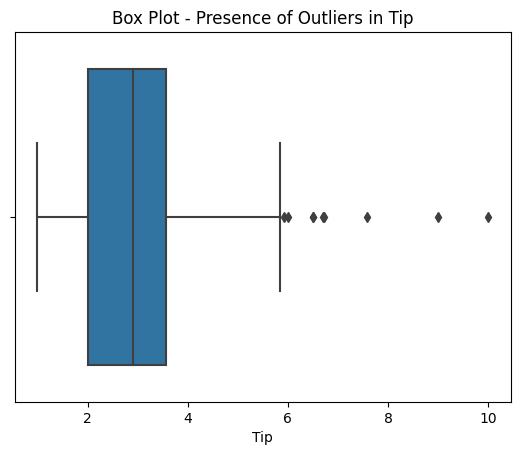


Dataset removed by the IQR technique:
     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
141       34.30   6.70    Male     No  Thur   Lunch     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
183       23.17   6.50    Male    Yes   Sun  Dinner     4
212       48.33   9.00    Male     No   Sat  Dinner     4
214       28.17   6.50  Female    Yes   Sat  Dinner     3
239       29.03   5.92    Male     No   Sat  Dinner     3


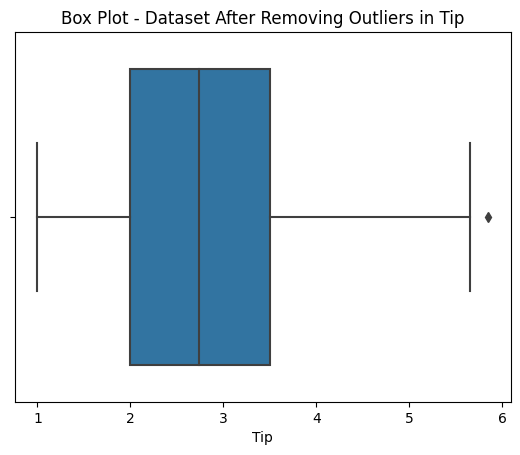


Dataset after removing outliers:
     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
238       35.83  4.67  Female     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[235 rows x 7 columns]


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('tips.csv')

# Calculate the IQR range
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3 - Q1

# Identify the lower and upper bounds for outliers
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Determine if there are any outliers in the 'tip' column
outliers_present = df[(df['tip'] < lower_bound) | (df['tip'] > upper_bound)]

# Print whether outliers are present
if outliers_present.empty:
    print("No outliers are present in the 'tip' column.")
else:
    print("Outliers are present in the 'tip' column.")

# Remove outliers using the IQR technique
df_cleaned = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]

# Visualize the presence of outliers using a box plot
plt.figure()
sns.boxplot(x=df['tip'])
plt.xlabel('Tip')
plt.title('Box Plot - Presence of Outliers in Tip')
plt.show()

# Print the dataset removed by the IQR technique
print("\nDataset removed by the IQR technique:")
print(outliers_present)

# Visualize the dataset after removing outliers using a box plot
plt.figure()
sns.boxplot(x=df_cleaned['tip'])
plt.xlabel('Tip')
plt.title('Box Plot - Dataset After Removing Outliers in Tip')
plt.show()

# Print the updated dataset after removing outliers
print("\nDataset after removing outliers:")
print(df_cleaned)




### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [20]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('tips.csv')

# One-hot encode categorical columns with 1 and 0
categorical_columns = ['sex', 'smoker', 'day', 'time']
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype=int)

# Print random 5 samples from the dataframe
print(df_encoded.sample(n=5))

     total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes   
116       29.93  5.07     4           0         1          1           0  \
45        18.29  3.00     2           0         1          1           0   
60        20.29  3.21     2           0         1          0           1   
89        21.16  3.00     2           0         1          1           0   
3         23.68  3.31     2           0         1          1           0   

     day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
116        0        0        1         0            1           0  
45         0        0        1         0            1           0  
60         0        1        0         0            1           0  
89         0        0        0         1            0           1  
3          0        0        1         0            1           0  


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [31]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv('tips.csv')

# Check the range of the 'total_bill' column
total_bill_range = df['total_bill'].max() - df['total_bill'].min()

# Print the range of the 'total_bill' column
print("Range of total_bill column:", total_bill_range)

# Transform the values to have a range of approximately 1
df['total_bill'] = (df['total_bill'] - df['total_bill'].min()) / total_bill_range


# Calculate the range of the 'total_bill' column
total_bill_range = df['total_bill'].max() - df['total_bill'].min()

# Transform the values to have a range of 1
df['total_bill'] = (df['total_bill'] - df['total_bill'].min()) / total_bill_range

# Print the range of the updated 'total_bill' column
updated_total_bill_range = df['total_bill'].max() - df['total_bill'].min()
print("Range of updated total_bill column:", updated_total_bill_range)

# Print the updated dataframe
print(df)












Range of total_bill column: 47.74
Range of updated total_bill column: 1.0
     total_bill   tip     sex smoker   day    time  size
0      0.291579  1.01  Female     No   Sun  Dinner     2
1      0.152283  1.66    Male     No   Sun  Dinner     3
2      0.375786  3.50    Male     No   Sun  Dinner     3
3      0.431713  3.31    Male     No   Sun  Dinner     2
4      0.450775  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239    0.543779  5.92    Male     No   Sat  Dinner     3
240    0.505027  2.00  Female    Yes   Sat  Dinner     2
241    0.410557  2.00    Male    Yes   Sat  Dinner     2
242    0.308965  1.75    Male     No   Sat  Dinner     2
243    0.329074  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Read the dataset from a CSV file
filename = "tips.csv"
tips_df = pd.read_csv(filename)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    tips_df[col] = label_encoder.fit_transform(tips_df[col])

# Separate the target column and feature columns
X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

# Print the encoded DataFrame and the X, y variables
print("Encoded DataFrame:")
print(tips_df)
print("X:")
print(X)
print("y:")
print(y)


Encoded DataFrame:
     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    2     0     2
1         10.34  1.66    1       0    2     0     3
2         21.01  3.50    1       0    2     0     3
3         23.68  3.31    1       0    2     0     2
4         24.59  3.61    0       0    2     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    1     0     3
240       27.18  2.00    0       1    1     0     2
241       22.67  2.00    1       1    1     0     2
242       17.82  1.75    1       0    1     0     2
243       18.78  3.00    0       0    3     0     2

[244 rows x 7 columns]
X:
     total_bill  sex  smoker  day  time  size
0         16.99    0       0    2     0     2
1         10.34    1       0    2     0     3
2         21.01    1       0    2     0     3
3         23.68    1       0    2     0     2
4         24.59    0       0    2     0     4
..          ...  ...     ...  ...   ...   ...
239     

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset from the CSV file
df = pd.read_csv('tips.csv')

# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

# Standardize the columns "total_bill" and "size" using min-max scaling
scaler = MinMaxScaler()
train_df[['total_bill', 'size']] = scaler.fit_transform(train_df[['total_bill', 'size']])
test_df[['total_bill', 'size']] = scaler.transform(test_df[['total_bill', 'size']])

# Print the train and test sets
print("Train set:")
print(train_df)
print()

print("Test set:")
print(test_df)
print()

# Print the shapes of train and test sets
print("Train set shape (including target):", train_df.shape)
print("Train set shape (features only):", train_df.drop('tip', axis=1).shape)
print()

print("Test set shape (including target):", test_df.shape)
print("Test set shape (features only):", test_df.drop('tip', axis=1).shape)
print()

# Print the shapes of target variables
print("Train target shape:", train_df['tip'].shape)
print("Test target shape:", test_df['tip'].shape)


Train set:
     total_bill   tip     sex smoker  day    time  size
234    0.217044  3.00    Male    Yes  Sat  Dinner   0.2
227    0.326232  3.00    Male     No  Sat  Dinner   0.6
180    0.641367  3.68    Male    Yes  Sun  Dinner   0.6
5      0.433644  4.71    Male     No  Sun  Dinner   0.6
56     0.715934  3.00    Male    Yes  Sat  Dinner   0.6
..          ...   ...     ...    ...  ...     ...   ...
106    0.327119  4.06    Male    Yes  Sat  Dinner   0.2
14     0.201509  3.02  Female     No  Sun  Dinner   0.2
92     0.000000  1.00  Female    Yes  Fri  Dinner   0.2
179    0.640923  3.55    Male    Yes  Sun  Dinner   0.2
102    0.855526  2.50  Female    Yes  Sat  Dinner   0.4

[170 rows x 7 columns]

Test set:
     total_bill   tip     sex smoker   day    time  size
24     0.312250  3.18    Male     No   Sat  Dinner   0.2
6      0.067022  2.00    Male     No   Sun  Dinner   0.2
153    0.417221  2.00    Male     No   Sun  Dinner   0.6
211    0.446960  5.16    Male    Yes   Sat  Dinner   0

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset from the CSV file
df = pd.read_csv('tips.csv')




# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the R-squared value for the test data
r_squared_test = r2_score(y_test, y_pred)

# Print the R-squared value for the test data
print("R-squared value (Test Data): {:.4f}".format(r_squared_test))



R-squared value (Test Data): 0.4908


### Happy Learning:)